In [405]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,MinMaxScaler,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

df = pd.read_csv('mobile phone price prediction.csv')
df.drop(columns = 'Unnamed: 0',inplace = True)
x = df.drop(columns = 'Price')
y = df[['Price']]

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
si = SimpleImputer(strategy = 'most_frequent')
si.fit(X_train[['Screen_resolution','Android_version', 'company', 'Inbuilt_memory', 'fast_charging', 'Processor']])
X_train_new  = si.transform(X_train[['Screen_resolution','Android_version', 'company', 'Inbuilt_memory', 'fast_charging', 'Processor']])
X_train_new = pd.DataFrame(X_train_new,columns = ['Screen_resolution','Android_version', 'company', 'Inbuilt_memory', 'fast_charging', 'Processor'])
X_train.drop(columns = ['Screen_resolution','Android_version', 'company', 'Inbuilt_memory', 'fast_charging', 'Processor'],inplace = True)
X_train = pd.concat([X_train.reset_index(drop=True),X_train_new.reset_index(drop=True)],axis = 1)


X_test_new = si.transform(X_test[['Screen_resolution','Android_version', 'company', 'Inbuilt_memory', 'fast_charging', 'Processor']])
X_test_new = pd.DataFrame(X_test_new,columns = ['Screen_resolution','Android_version', 'company', 'Inbuilt_memory', 'fast_charging', 'Processor'])
X_test.drop(columns = ['Screen_resolution','Android_version', 'company', 'Inbuilt_memory', 'fast_charging', 'Processor'],inplace = True)
X_test = pd.concat([X_test.reset_index(drop=True),X_test_new.reset_index(drop=True)],axis = 1)
# X_train.isnull().sum()


In [406]:

# ohe = name
# oe = 
# scaling  = rating 
min_max = MinMaxScaler()

X_train_new = min_max.fit_transform(X_train[['Rating']])
X_train_new = pd.DataFrame(X_train_new,columns = ['Rating'])
X_train.drop(columns = ['Rating'],inplace = True)
X_train = pd.concat([X_train.reset_index(drop = True),X_train_new.reset_index(drop = True)],axis = 1)

a = X_train['Rating']


pt = PowerTransformer(method = 'yeo-johnson')
X_train_new = pt.fit_transform(X_train[['Rating']])
X_train_new = pd.DataFrame(X_train_new,columns = ['Rating'])
X_train.drop(columns = ['Rating'],inplace = True)
X_train = pd.concat([X_train.reset_index(drop = True),X_train_new.reset_index(drop = True)],axis = 1)

X_train_new = min_max.fit_transform(X_train[['Spec_score']])
X_train_new = pd.DataFrame(X_train_new,columns = ['Spec_score'])
X_train.drop(columns = ['Spec_score'],inplace = True)
X_train = pd.concat([X_train.reset_index(drop = True),X_train_new.reset_index(drop = True)],axis = 1)



pt = PowerTransformer(method = 'yeo-johnson')
X_train_new = pt.fit_transform(X_train[['Spec_score']])
X_train_new = pd.DataFrame(X_train_new,columns = ['Spec_score'])
X_train.drop(columns = ['Spec_score'],inplace = True)

X_train = pd.concat([X_train.reset_index(drop = True),X_train_new.reset_index(drop = True)],axis = 1)


In [407]:
cat = X_train['No_of_sim'].unique()
cat = [cat.tolist()]

oe = OrdinalEncoder(categories = cat)
oe.fit(X_train[['No_of_sim']])
X_train_new = oe.transform(X_train[['No_of_sim']])
X_train_new = pd.DataFrame(X_train_new,columns = ['No_of_sim'])
X_train.drop(columns = 'No_of_sim',inplace = True)
X_train = pd.concat([X_train.reset_index(drop = True),X_train_new.reset_index(drop = True)],axis = 1)
X_train

,Name,Ram,Battery,Display,Camera,External_Memory,Processor_name,Screen_resolution,Android_version,company,Inbuilt_memory,fast_charging,Processor,Rating,Spec_score,No_of_sim
0,Realme Narzo 20,4 GB RAM,6000 mAh Battery,6.5 inches,48 MP + 8 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 256 GB",Helio G85,720 x 1600 px Display with Water Drop Notch,10,Realme,64 GB inbuilt,18W Fast Charging,Octa Core,-1.614509,-1.015502,0.0
1,Xiaomi Mi 11i 5G,6 GB RAM,5160 mAh Battery,6.67 inches,108 MP + 8 MP + 2 MP Triple Rear &amp; 16 MP F...,"Memory Card (Hybrid), upto 1 TB",Dimensity 920 5G,2400 x 1080 px,11,Xiaomi,128 GB inbuilt,67W Fast Charging,Octa Core,-1.614509,-0.005647,1.0
2,Google Pixel 9 Pro,12 GB RAM,5000 mAh Battery,6.1 inches,50 MP + 50 MP + 50 MP Triple Rear &amp; 50 MP ...,Android v14,Google Tensor G4,1440 x 3120 px,13,Google,256 GB inbuilt,45W Fast Charging,Octa Core Processor,0.309811,0.260437,2.0
3,Samsung Galaxy A13 (4GB RAM + 128GB),4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",Octa Core,1080 x 2408 px Display with Water Drop Notch,12,Samsung,128 GB inbuilt,25W Fast Charging,2 GHz Processor,0.309811,-0.711109,0.0
4,Honor X6s,4 GB RAM,5000 mAh Battery,6.5 inches,50 MP + 2 MP Triple Rear &amp; 5 MP Front Camera,Memory Card (Hybrid),Helio G25,720 x 1600 px Display with Water Drop Notch,12,Honor,64 GB inbuilt,10W Fast Charging,Octa Core,1.618777,-1.201910,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,OnePlus Ace 2,12 GB RAM,5000 mAh Battery,6.74 inches,50 MP + 8 MP + 2 MP Triple Rear &amp; 16 MP Fr...,Android v13,Snapdragon 8+ Gen1,1240 x 2772 px,13,OnePlus,256 GB inbuilt,100W Fast Charging,Octa Core,0.526653,0.842879,1.0
1092,Xiaomi Redmi 13C (6GB RAM + 128GB),6 GB RAM,5000 mAh Battery,6.74 inches,50 MP + 2 MP + 0.08 MP Triple Rear &amp; 8 MP ...,"Memory Card Supported, upto 1 TB",Helio G85,720 x 1600 px,13,Xiaomi,128 GB inbuilt,18W Fast Charging,Octa Core,0.961960,-0.711109,0.0
1093,Honor X5,2 GB RAM,5000 mAh Battery,6.5 inches,8 MP Rear &amp; 5 MP Front Camera,Memory Card (Hybrid),Helio G25,720 x 1600 px Display with Water Drop Notch,12,Honor,32 GB inbuilt,18W Fast Charging,Octa Core,-0.765681,-1.957058,0.0
1094,Realme Narzo N53,4 GB RAM,5000 mAh Battery,6.74 inches,50 MP + Depth Sensor Dual Rear &amp; 8 MP Fron...,"Memory Card Supported, upto 2 TB",Unisoc T612,720 x 1600 px,13,Realme,64 GB inbuilt,33W Fast Charging,Octa Core,1.618777,-1.201910,0.0


In [408]:
cat =[['1 GB RAM', '1.5 GB RAM', '2 GB RAM', '3 GB RAM', '4 GB RAM', '6 GB RAM', '8 GB RAM', '12 GB RAM', '16 GB RAM', '18 GB RAM', '24 GB RAM', '128 GB inbuilt', '256 GB inbuilt', '512 GB inbuilt', '6000 mAh Battery with 22.5W Fast Charging', 'Helio G90T']]
cat


oe = OrdinalEncoder(categories = cat)
oe.fit(X_train[['Ram']])
X_train_new = oe.transform(X_train[['Ram']])
X_train_new = pd.DataFrame(X_train_new,columns = ['Ram'])
X_train.drop(columns = 'Ram',inplace = True)
X_train = pd.concat([X_train.reset_index(drop = True),X_train_new.reset_index(drop = True)],axis = 1)


In [409]:
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=np.int32)
X_train_ohe = ohe.fit_transform(X_train[['Name']])
col = ohe.get_feature_names_out(['Name'])
X_train_ohe = pd.DataFrame(X_train_ohe,columns = col)
X_train.drop(columns = ['Name'],inplace = True)
X_train = pd.concat([X_train.reset_index(drop=True),X_train_ohe.reset_index(drop=True)],axis = 1)
X_train

,Battery,Display,Camera,External_Memory,Processor_name,Screen_resolution,Android_version,company,Inbuilt_memory,fast_charging,...,Name_itel P55 4G,Name_itel P55 4G (8GB RAM + 128GB),Name_itel P55 5G,Name_itel P55 5G (6GB RAM + 128GB),Name_itel P55 Plus,Name_itel P55T,Name_itel RS4,Name_itel S16 Pro,Name_itel S23 Plus,Name_itel S24
0,6000 mAh Battery,6.5 inches,48 MP + 8 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 256 GB",Helio G85,720 x 1600 px Display with Water Drop Notch,10,Realme,64 GB inbuilt,18W Fast Charging,...,0,0,0,0,0,0,0,0,0,0
1,5160 mAh Battery,6.67 inches,108 MP + 8 MP + 2 MP Triple Rear &amp; 16 MP F...,"Memory Card (Hybrid), upto 1 TB",Dimensity 920 5G,2400 x 1080 px,11,Xiaomi,128 GB inbuilt,67W Fast Charging,...,0,0,0,0,0,0,0,0,0,0
2,5000 mAh Battery,6.1 inches,50 MP + 50 MP + 50 MP Triple Rear &amp; 50 MP ...,Android v14,Google Tensor G4,1440 x 3120 px,13,Google,256 GB inbuilt,45W Fast Charging,...,0,0,0,0,0,0,0,0,0,0
3,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",Octa Core,1080 x 2408 px Display with Water Drop Notch,12,Samsung,128 GB inbuilt,25W Fast Charging,...,0,0,0,0,0,0,0,0,0,0
4,5000 mAh Battery,6.5 inches,50 MP + 2 MP Triple Rear &amp; 5 MP Front Camera,Memory Card (Hybrid),Helio G25,720 x 1600 px Display with Water Drop Notch,12,Honor,64 GB inbuilt,10W Fast Charging,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,5000 mAh Battery,6.74 inches,50 MP + 8 MP + 2 MP Triple Rear &amp; 16 MP Fr...,Android v13,Snapdragon 8+ Gen1,1240 x 2772 px,13,OnePlus,256 GB inbuilt,100W Fast Charging,...,0,0,0,0,0,0,0,0,0,0
1092,5000 mAh Battery,6.74 inches,50 MP + 2 MP + 0.08 MP Triple Rear &amp; 8 MP ...,"Memory Card Supported, upto 1 TB",Helio G85,720 x 1600 px,13,Xiaomi,128 GB inbuilt,18W Fast Charging,...,0,0,0,0,0,0,0,0,0,0
1093,5000 mAh Battery,6.5 inches,8 MP Rear &amp; 5 MP Front Camera,Memory Card (Hybrid),Helio G25,720 x 1600 px Display with Water Drop Notch,12,Honor,32 GB inbuilt,18W Fast Charging,...,0,0,0,0,0,0,0,0,0,0
1094,5000 mAh Battery,6.74 inches,50 MP + Depth Sensor Dual Rear &amp; 8 MP Fron...,"Memory Card Supported, upto 2 TB",Unisoc T612,720 x 1600 px,13,Realme,64 GB inbuilt,33W Fast Charging,...,0,0,0,0,0,0,0,0,0,0


C:\Users\skars\AppData\Local\Temp\ipykernel_10916\763709294.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Battery'])
C:\Users\skars\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Battery', ylabel='Density'>

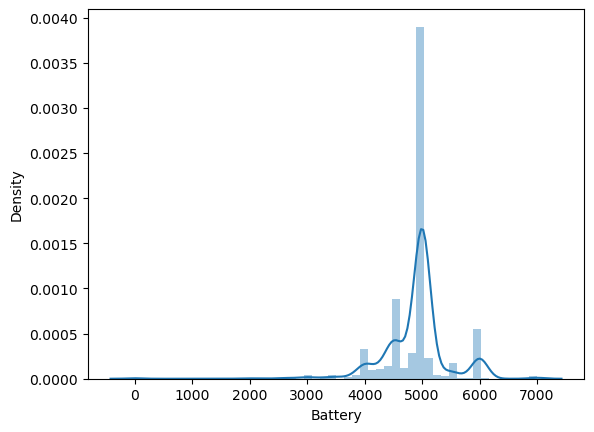

In [410]:
num = X_train['Battery'].unique()
num = pd.DataFrame(num,columns = ['Battery'])
num['Battery'] =num['Battery'].apply(lambda s: s.split()[0])
num['Battery']= pd.to_numeric(num['Battery'],
                                   errors='coerce',
                                   downcast='integer')
# X_train.drop(columns = ['Battery'],inplace = True)
# X_train = pd.concat([X_train.reset_index(drop = True),num.reset_index(drop = True)],axis =1)
X_train['Battery'] = X_train['Battery'].map(dict(zip(unique_batteries, unique_batteries_df['Battery'])))
sns.distplot(X_train['Battery'])



C:\Users\skars\AppData\Local\Temp\ipykernel_10916\2829759173.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Battery'])
C:\Users\skars\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


,Display,Camera,External_Memory,Processor_name,Screen_resolution,Android_version,company,Inbuilt_memory,fast_charging,Processor,...,Name_itel P55 4G (8GB RAM + 128GB),Name_itel P55 5G,Name_itel P55 5G (6GB RAM + 128GB),Name_itel P55 Plus,Name_itel P55T,Name_itel RS4,Name_itel S16 Pro,Name_itel S23 Plus,Name_itel S24,Battery
0,6.5 inches,48 MP + 8 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 256 GB",Helio G85,720 x 1600 px Display with Water Drop Notch,10,Realme,64 GB inbuilt,18W Fast Charging,Octa Core,...,0,0,0,0,0,0,0,0,0,2.221855
1,6.67 inches,108 MP + 8 MP + 2 MP Triple Rear &amp; 16 MP F...,"Memory Card (Hybrid), upto 1 TB",Dimensity 920 5G,2400 x 1080 px,11,Xiaomi,128 GB inbuilt,67W Fast Charging,Octa Core,...,0,0,0,0,0,0,0,0,0,0.426284
2,6.1 inches,50 MP + 50 MP + 50 MP Triple Rear &amp; 50 MP ...,Android v14,Google Tensor G4,1440 x 3120 px,13,Google,256 GB inbuilt,45W Fast Charging,Octa Core Processor,...,0,0,0,0,0,0,0,0,0,0.120171
3,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",Octa Core,1080 x 2408 px Display with Water Drop Notch,12,Samsung,128 GB inbuilt,25W Fast Charging,2 GHz Processor,...,0,0,0,0,0,0,0,0,0,0.120171
4,6.5 inches,50 MP + 2 MP Triple Rear &amp; 5 MP Front Camera,Memory Card (Hybrid),Helio G25,720 x 1600 px Display with Water Drop Notch,12,Honor,64 GB inbuilt,10W Fast Charging,Octa Core,...,0,0,0,0,0,0,0,0,0,0.120171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,6.74 inches,50 MP + 8 MP + 2 MP Triple Rear &amp; 16 MP Fr...,Android v13,Snapdragon 8+ Gen1,1240 x 2772 px,13,OnePlus,256 GB inbuilt,100W Fast Charging,Octa Core,...,0,0,0,0,0,0,0,0,0,0.120171
1092,6.74 inches,50 MP + 2 MP + 0.08 MP Triple Rear &amp; 8 MP ...,"Memory Card Supported, upto 1 TB",Helio G85,720 x 1600 px,13,Xiaomi,128 GB inbuilt,18W Fast Charging,Octa Core,...,0,0,0,0,0,0,0,0,0,0.120171
1093,6.5 inches,8 MP Rear &amp; 5 MP Front Camera,Memory Card (Hybrid),Helio G25,720 x 1600 px Display with Water Drop Notch,12,Honor,32 GB inbuilt,18W Fast Charging,Octa Core,...,0,0,0,0,0,0,0,0,0,0.120171
1094,6.74 inches,50 MP + Depth Sensor Dual Rear &amp; 8 MP Fron...,"Memory Card Supported, upto 2 TB",Unisoc T612,720 x 1600 px,13,Realme,64 GB inbuilt,33W Fast Charging,Octa Core,...,0,0,0,0,0,0,0,0,0,0.120171


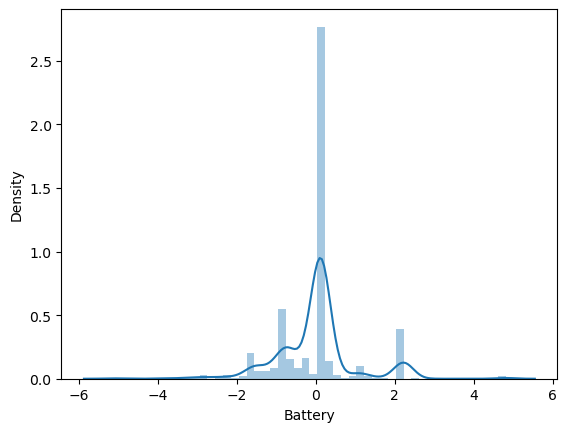

In [411]:
X_train_new = min_max.fit_transform(X_train[['Battery']])
X_train_new = pd.DataFrame(X_train_new,columns = ['Battery'])
X_train.drop(columns = ['Battery'],inplace = True)
X_train = pd.concat([X_train.reset_index(drop = True),X_train_new.reset_index(drop = True)],axis = 1)
X_train_new=pt.fit_transform(X_train[['Battery']])
X_train_new = pd.DataFrame(X_train_new,columns = ['Battery'])
X_train.drop(columns = ['Battery'],inplace = True)
X_train = pd.concat([X_train.reset_index(drop = True),X_train_new.reset_index(drop = True)],axis = 1)

sns.distplot(X_train['Battery'])
X_train

In [412]:
num = X_train['Display'].unique()
num = pd.DataFrame(num,columns = ['Display'])
num['Display'] =num['Display'].apply(lambda s: s.split()[0])
num['Display']= pd.to_numeric(num['Display'],
                                   errors='coerce',
                                   downcast='integer')
X_train.drop(columns = ['Display'],inplace = True)
X_train = pd.concat([X_train.reset_index(drop = True),num.reset_index(drop = True)],axis = 1)
si = SimpleImputer(strategy = 'mean')
X_train_new = si.fit_transform(X_train[['Display']])
X_train_new= pd.DataFrame(X_train_new,columns = ['Display'])

X_train.drop(columns = ['Display'],inplace = True)
X_train = pd.concat([X_train.reset_index(drop = True),X_train_new.reset_index(drop = True)],axis = 1)
X_train.isnull().sum()

Camera                0
External_Memory       0
Processor_name        0
Screen_resolution     0
Android_version       0
                     ..
Name_itel S16 Pro     0
Name_itel S23 Plus    0
Name_itel S24         0
Battery               0
Display               0
Length: 1083, dtype: int64

C:\Users\skars\AppData\Local\Temp\ipykernel_10916\984199528.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Display'])
C:\Users\skars\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Display', ylabel='Density'>

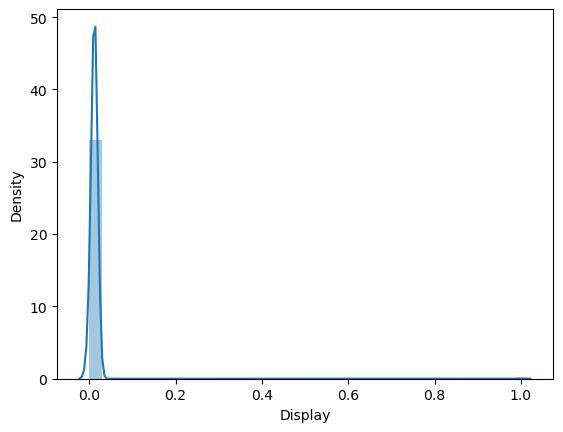

In [414]:
X_train_new = min_max.fit_transform(X_train[['Display']])
X_train_new = pd.DataFrame(X_train_new,columns = ['Display'])
X_train.drop(columns = ['Display'],inplace = True)
X_train = pd.concat([X_train.reset_index(drop = True),X_train_new.reset_index(drop = True)],axis = 1)
sns.distplot(X_train['Display'])

C:\Users\skars\AppData\Local\Temp\ipykernel_10916\3714121263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Display'])
C:\Users\skars\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Camera                0
External_Memory       0
Processor_name        0
Screen_resolution     0
Android_version       0
                     ..
Name_itel S16 Pro     0
Name_itel S23 Plus    0
Name_itel S24         0
Battery               0
Display               0
Length: 1083, dtype: int64

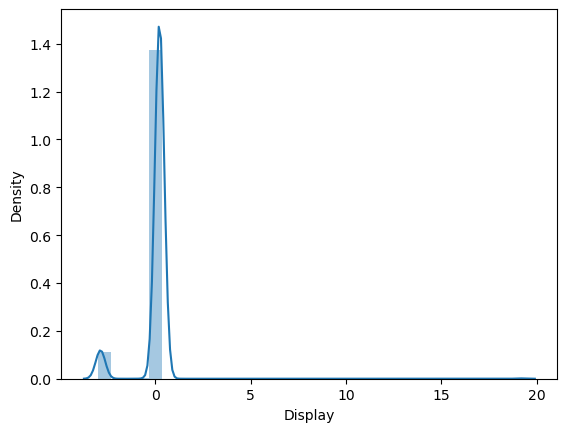

In [417]:
pt = PowerTransformer(method = 'yeo-johnson')
X_train_new = pt.fit_transform(X_train[['Display']])
X_train_new = pd.DataFrame(X_train_new,columns = ['Display'])
X_train.drop(columns = ['Display'],inplace = True)
X_train = pd.concat([X_train.reset_index(drop = True),X_train_new.reset_index(drop = True)],axis = 1)
sns.distplot(X_train['Display'])
X_train.isnull().sum()